In [84]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dabl

In [85]:
data = pd.read_csv('../dataset/WildBlueberryPollinationSimulationData.csv')
data.head(10)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345454,2825.003738
6,6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [86]:
data.shape

(777, 18)

In [40]:
data.drop('Row#',axis = 'columns', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [87]:
data.shape

(777, 18)

In [42]:
data.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

No missing value

In [43]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
772    False
773    False
774    False
775    False
776    False
Length: 777, dtype: bool

No duplicated values

In [44]:
data.describe(include='all')

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


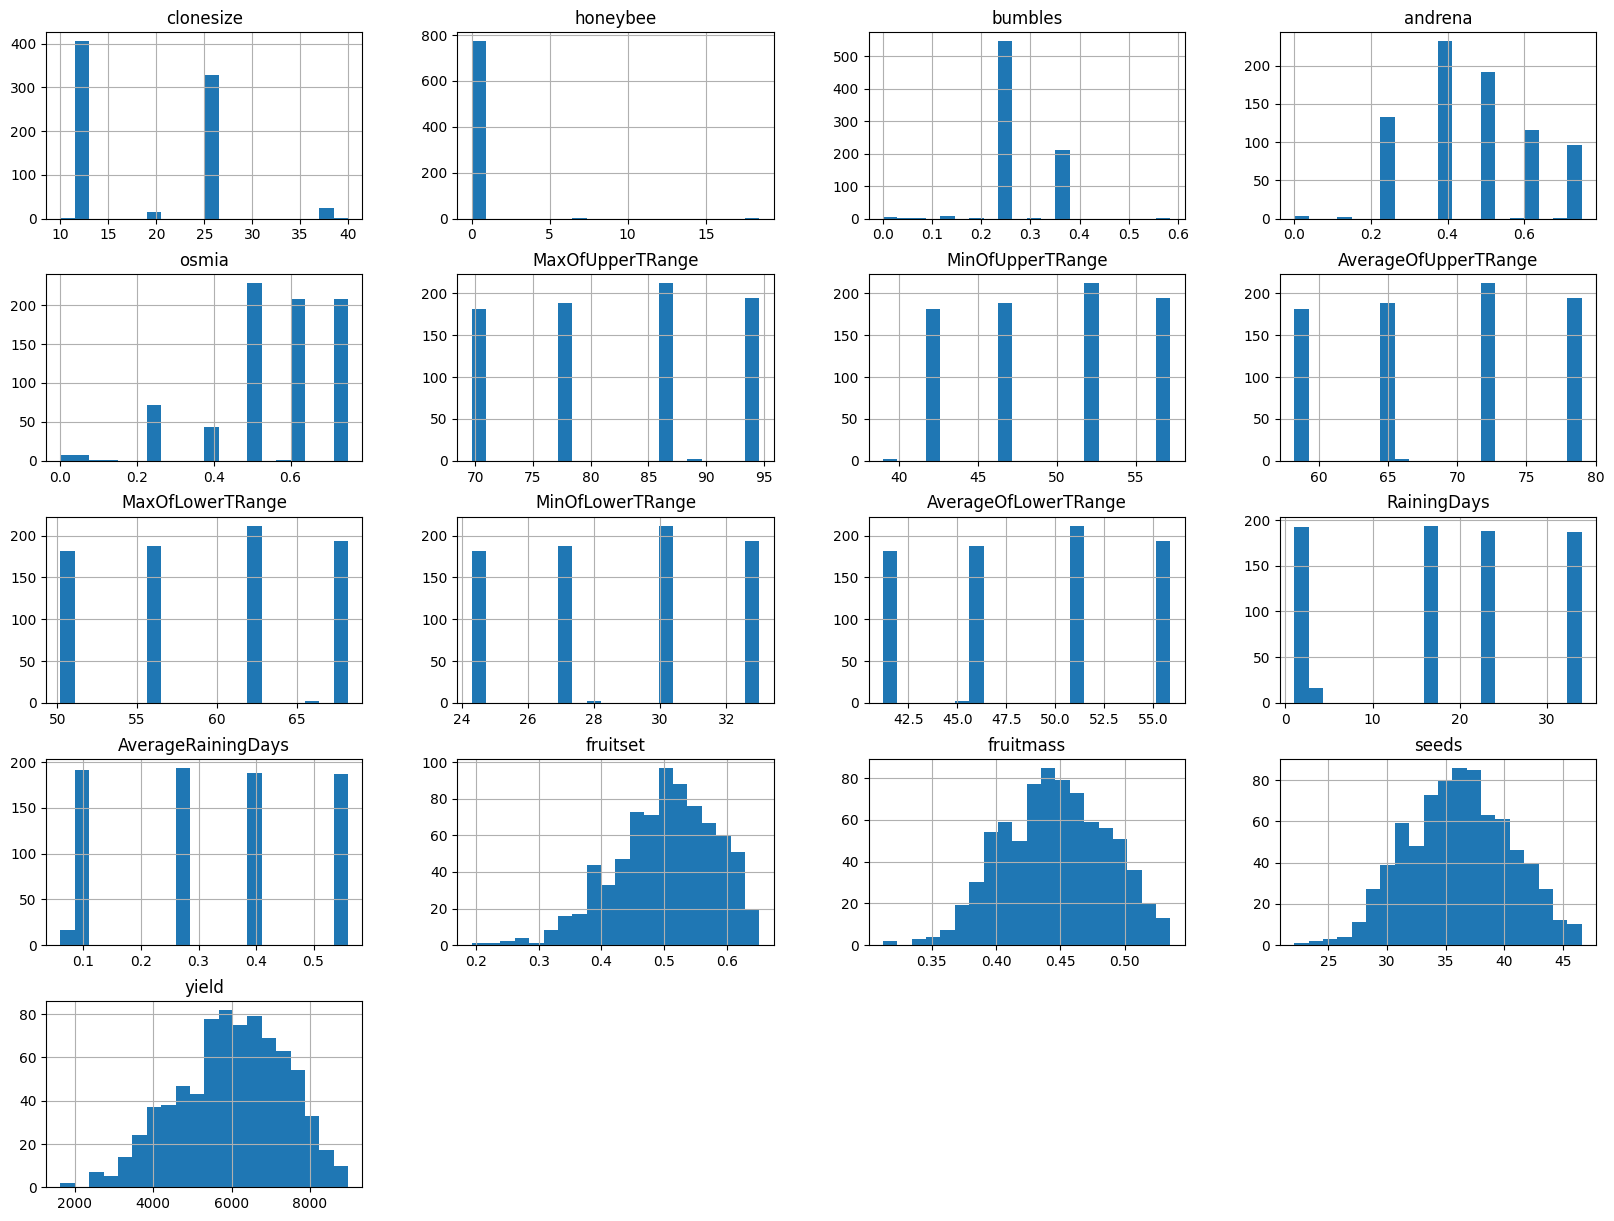

In [45]:
#What is this???
data.hist(layout=(5,4), figsize=(20,15),bins=20)
plt.show()

Target looks like regression


/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9774485367467639) feature seeds. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.954948440306085) feature fruitmass. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.991316888206444) feature AverageRainingDays. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (1.0) feature Max

[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <AxesSubplot: title={'center': 'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <AxesSubplot: title={'center': 'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <AxesSubplot: title={'center': 'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<AxesSubplot: title={'center': 'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <AxesSubplot: title={'center': 'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <AxesSubplot: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <AxesSubplot: title={'center': 'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

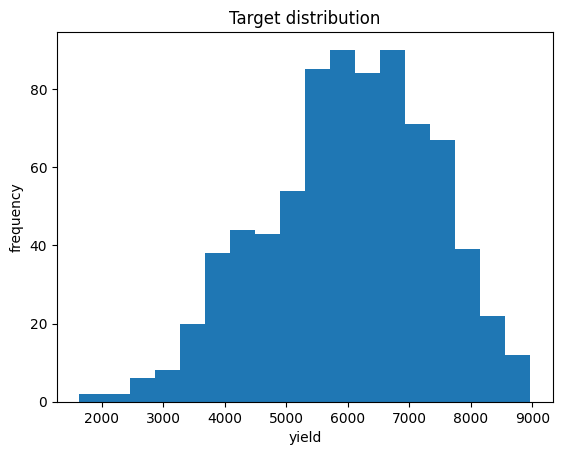

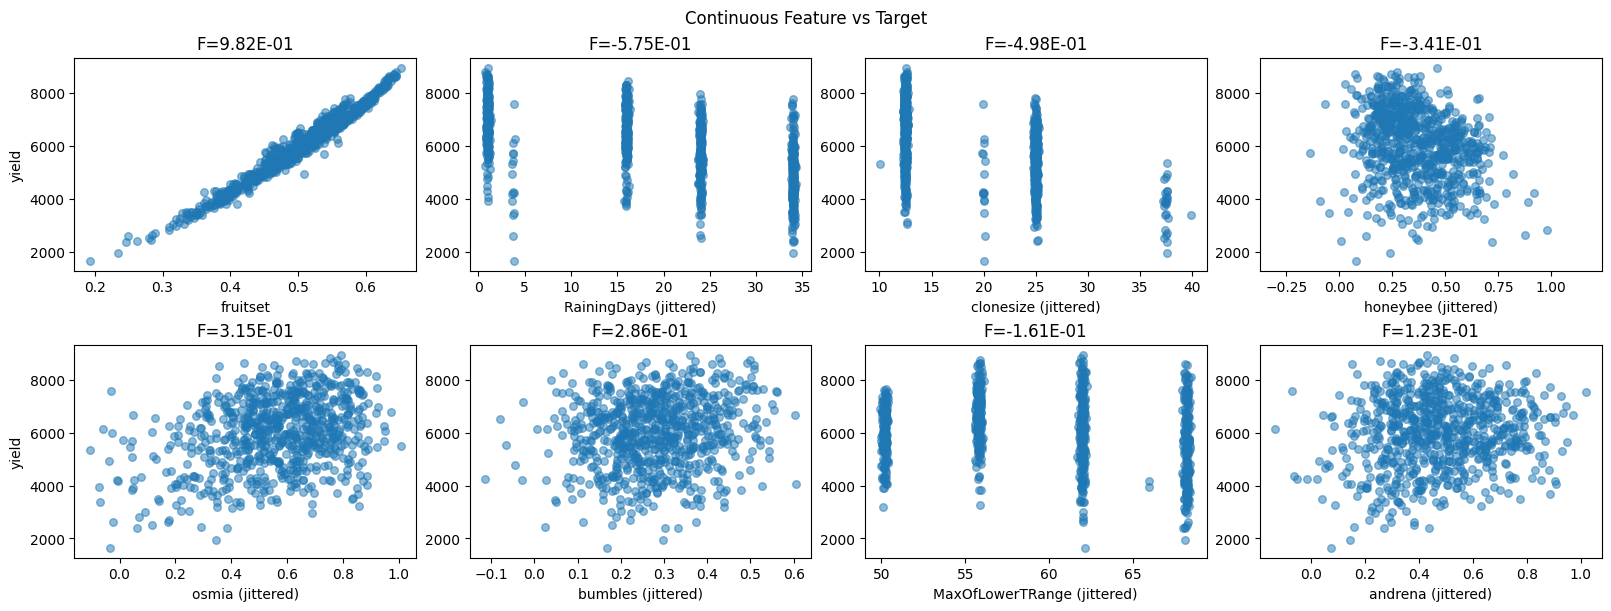

In [46]:
#EDA using dabl
dabl.plot(data, target_col = 'yield')

<AxesSubplot: >

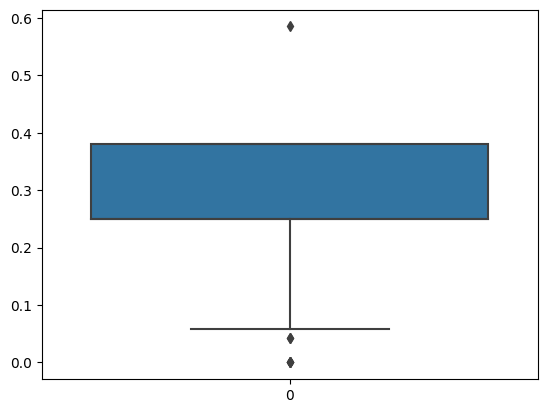

In [47]:
sns.boxplot(data["bumbles"])

<AxesSubplot: >

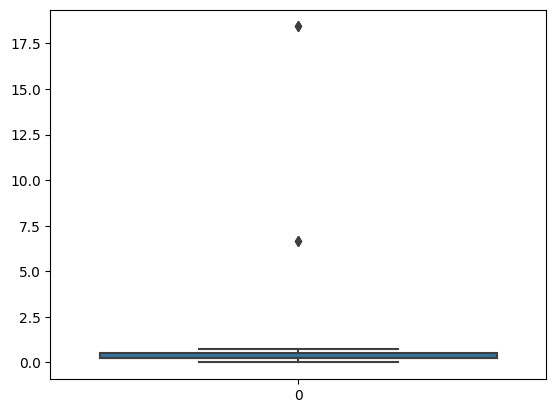

In [48]:
sns.boxplot(data['honeybee'])

<Figure size 2000x2000 with 0 Axes>

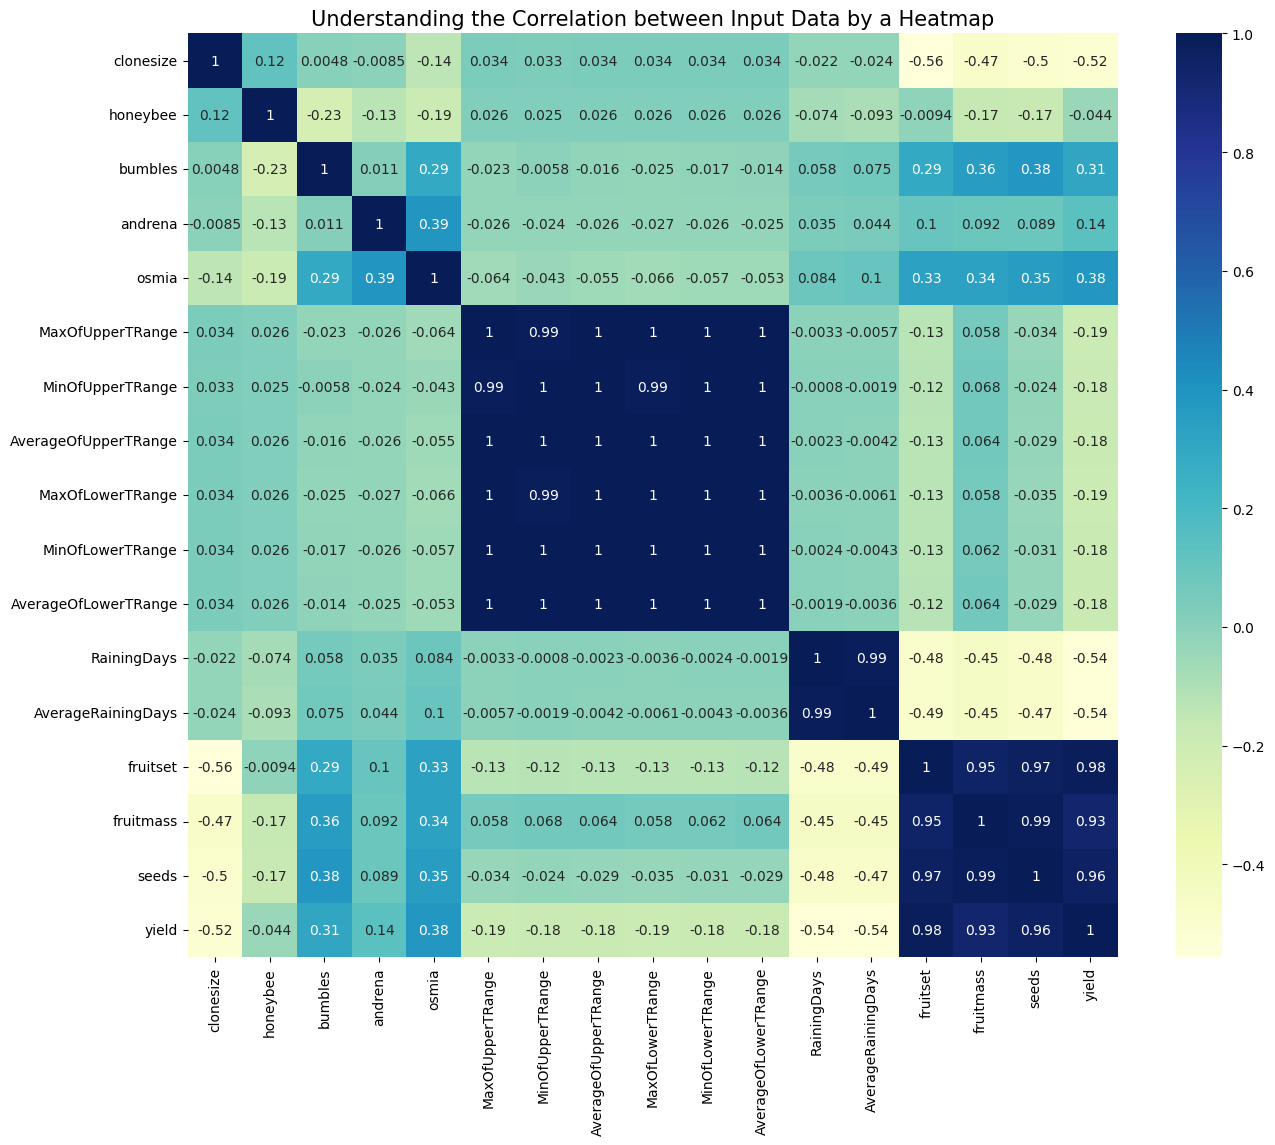

In [49]:
plt.figure(figsize=(20,20))
c = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

In [50]:
#splitting into independent and dependent features
X = data.drop(columns=['yield'])
y = data[['yield']]

In [51]:
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714


In [52]:
y.head()

,yield
0,3813.165795
1,4947.605663
2,3866.798965
3,4303.943030
4,3436.493543


In [53]:
#calculating Interquartile Range (IQR)
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 -q1
print(iqr)

clonesize               12.500000
honeybee                 0.250000
bumbles                  0.130000
andrena                  0.250000
osmia                    0.250000
MaxOfUpperTRange        11.600000
MinOfUpperTRange         5.200000
AverageOfUpperTRange     7.200000
MaxOfLowerTRange        10.200000
MinOfLowerTRange         3.000000
AverageOfLowerTRange     5.000000
RainingDays             20.230000
AverageRainingDays       0.290000
fruitset                 0.106571
fruitmass                0.059869
seeds                    6.123577
dtype: float64


In [54]:
iqr_data = data[~((data < (q1 - 1.5 * iqr)) | (data> (q3 + 1.5 * iqr))).any(axis=1)]
iqr_data.shape

/var/folders/9y/bzhfm7sj4xb45rnr615ysqp80000gn/T/ipykernel_17892/864295521.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  iqr_data = data[~((data < (q1 - 1.5 * iqr)) | (data> (q3 + 1.5 * iqr))).any(axis=1)]


(752, 17)

In [55]:
iqr_data = iqr_data.reset_index().drop(["index"], axis=1)
iqr_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.558394,0.478666,39.448650,7184.013843
748,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.494678,0.429703,34.784888,6292.960756
749,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.502842,0.430369,35.185971,6374.444297
750,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.513889,0.458966,37.209554,6180.951419


/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


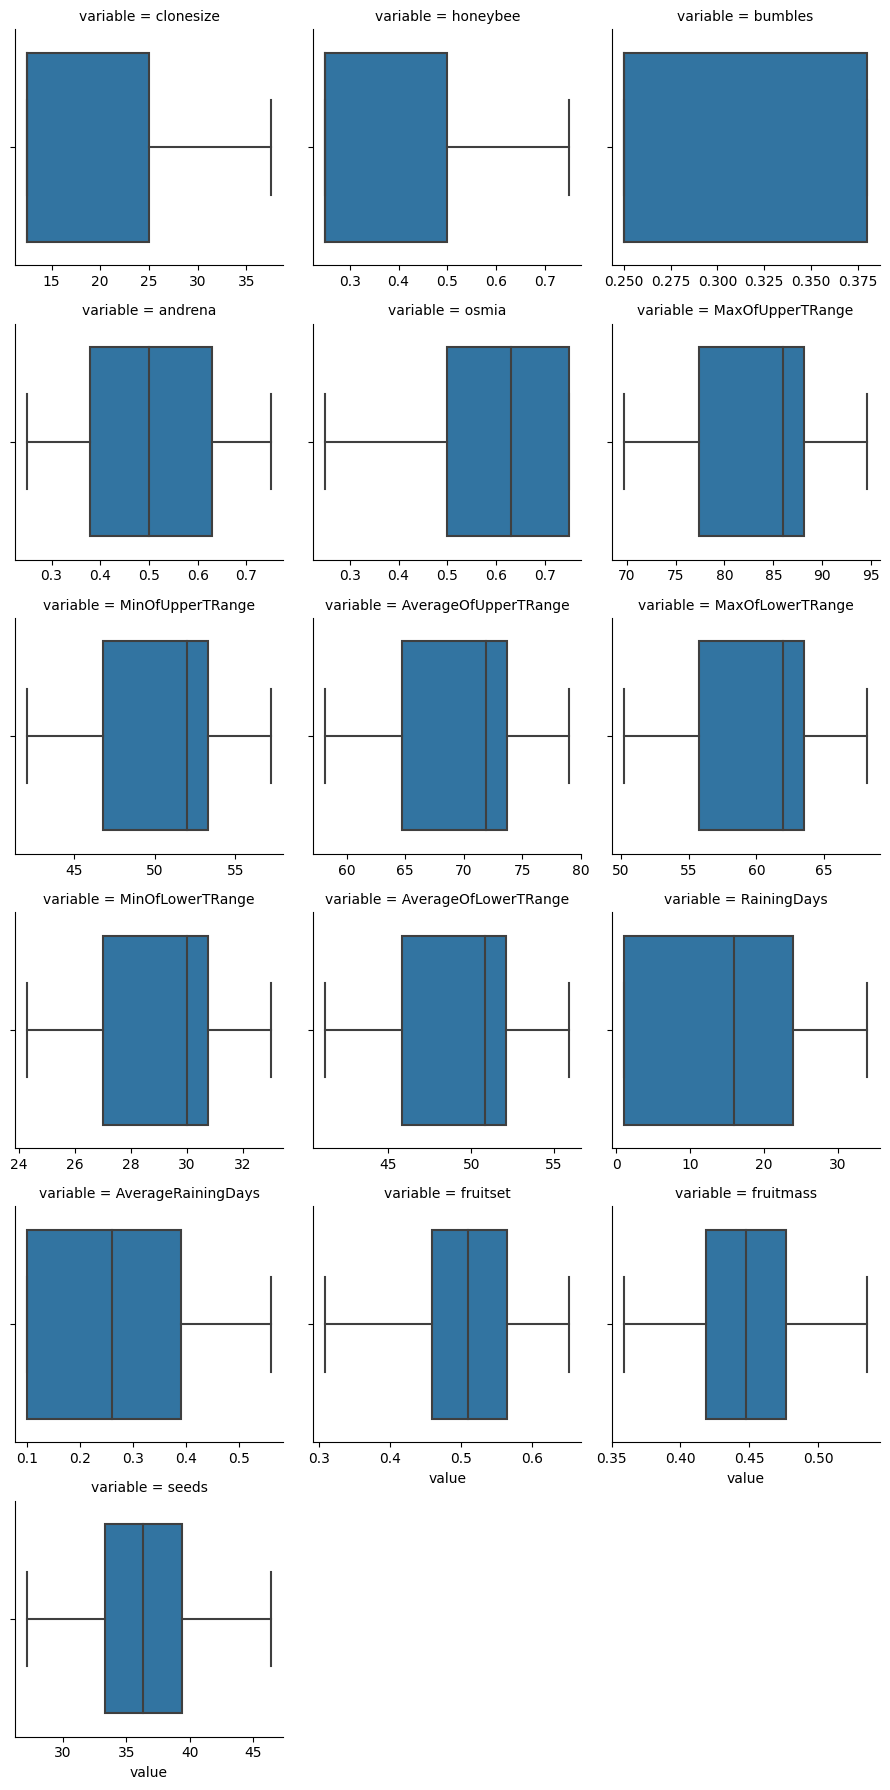

In [56]:
unpivot = pd.melt(iqr_data, iqr_data.describe().columns[-1], iqr_data.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [57]:
#splitting IQR processed data into independent and dependent features
X = iqr_data.drop(columns=['yield'])
y = iqr_data[['yield']]

In [58]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

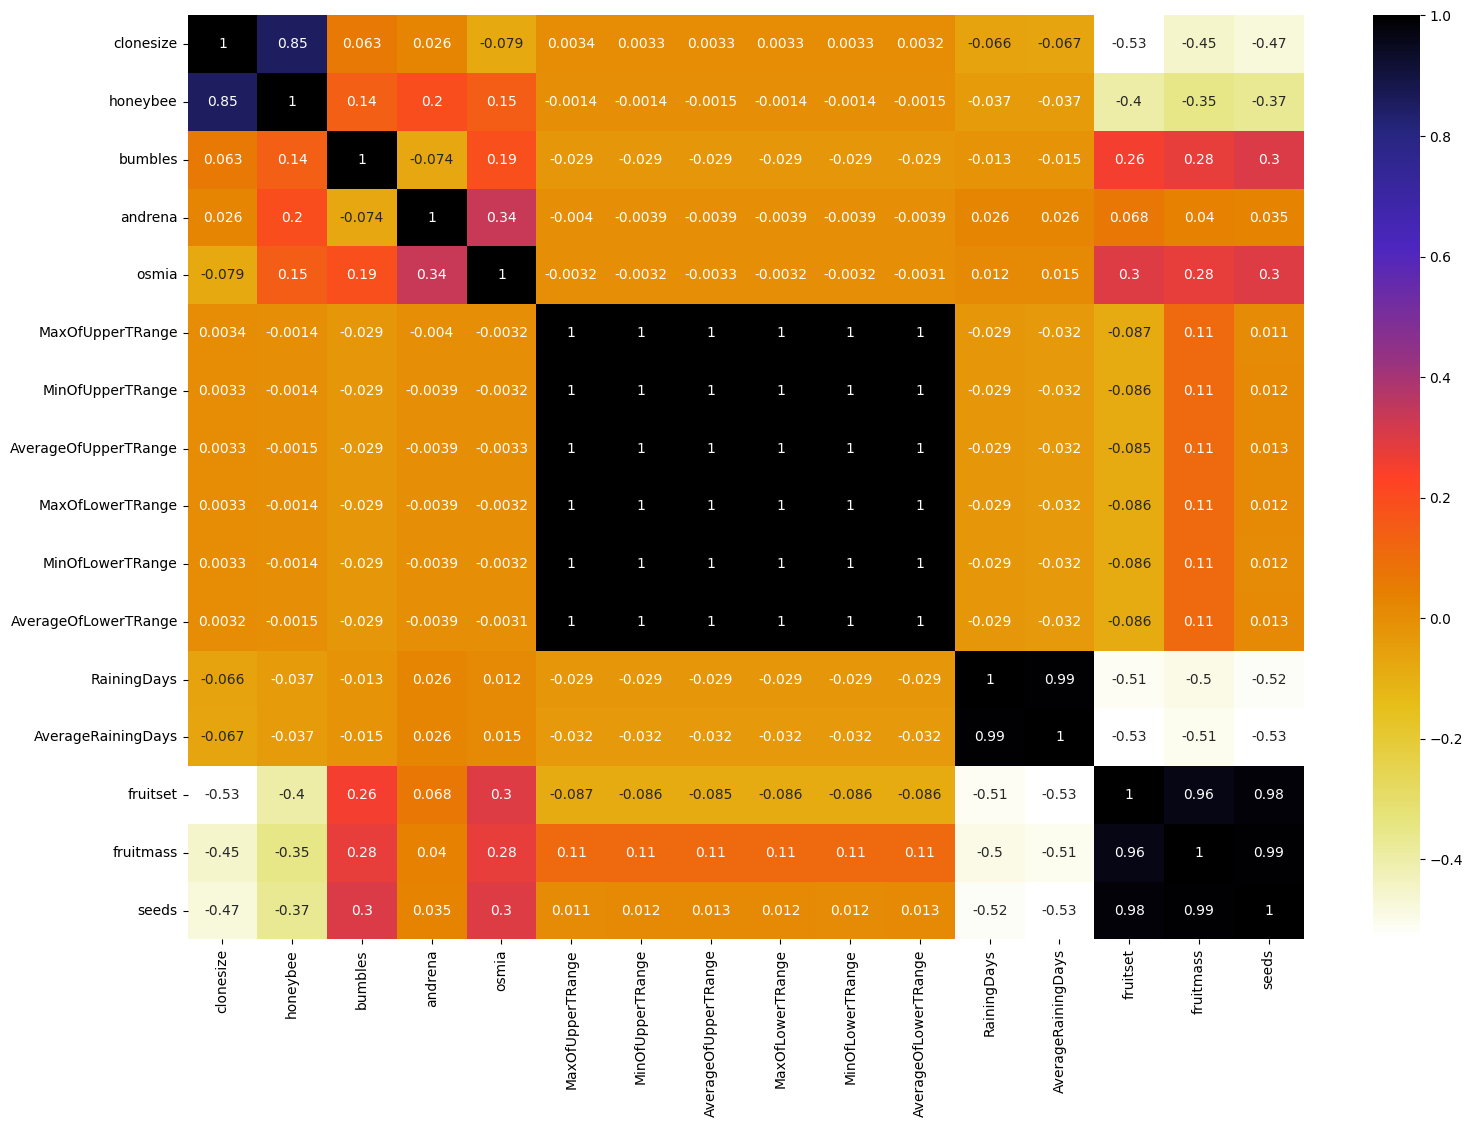

In [59]:
# Using Pearson Correlation
plt.figure(figsize=(18,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [60]:
def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:  
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [61]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

9

In [62]:
corr_features = {'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}
corr_features

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

In [63]:
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [64]:
X_train.shape

(601, 9)

In [65]:
X_test.shape

(151, 9)

Feature 0: 0.150027
Feature 1: 0.034829
Feature 2: 0.016573
Feature 3: 0.095969
Feature 4: 0.124925
Feature 5: 0.209084
Feature 6: 1.925528
Feature 7: 1.632590
Feature 8: 1.650936


/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


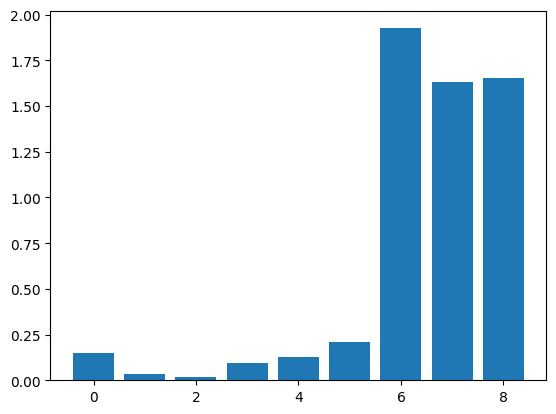

In [66]:
# Mutual Information feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
 
# feature selection
def select_features_info_based(X_train, y_train, X_test):
	mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	mutual_info.fit(X_train, y_train)
	# transform train input data
	X_train_fs = mutual_info.transform(X_train)
	# transform test input data
	X_test_fs = mutual_info.transform(X_test)
	return X_train_fs, X_test_fs, mutual_info
 

# Feature Selection
X_train_fs, X_test_fs, fs_info = select_features_info_based(X_train, y_train, X_test)
fs_info
# what are scores for the features
for i in range(len(fs_info.scores_)):
	print('Feature %d: %f' % (i, fs_info.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_info.scores_))], fs_info.scores_)
plt.show()

Feature 0: 181.436566
Feature 1: 50.396352
Feature 2: 6.262467
Feature 3: 80.579273
Feature 4: 13.139621
Feature 5: 291.735778
Feature 6: 19076.391809
Feature 7: 4263.896203
Feature 8: 9328.836779


/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


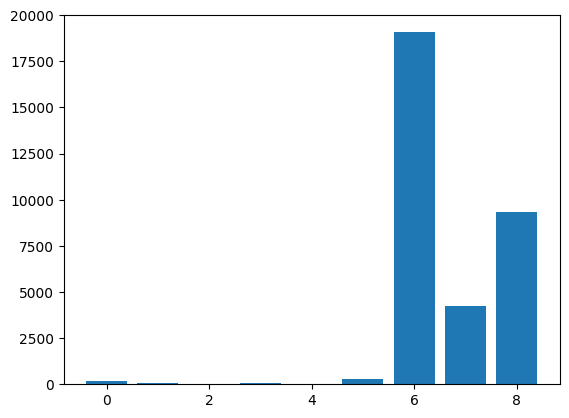

In [67]:
# Correlation feature selection 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
# Feature Selection
def select_features_corr_based(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	# learning relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_corr.scores_)):
	print('Feature %d: %f' % (i, fs_corr.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_corr.scores_))], fs_corr.scores_)
plt.show()


In [68]:
X_train_fs_model, X_test_fs_model, fs_info = select_features_info_based(X_train, y_train, X_test)

/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
X_train_fs_model.shape

(601, 9)

In [70]:
X_test_fs_model.shape

(151, 9)

#Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_fs_model, y_train)
pred_linear = reg.predict(X_test_fs_model)

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 90.284
MSE: 12892.118
RMSE: 113.543
R-Square: 0.992


Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
# Define model and state the random state to 1
rf_model = RandomForestRegressor(random_state=1)
# fitting the model
rf_model.fit(X_train_fs_model, y_train)
pred_rf = rf_model.predict(X_test_fs_model)
pred_rf = pred_rf.reshape(151,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 111.513
MSE: 19606.416
RMSE: 140.023
R-Square: 0.988


/var/folders/9y/bzhfm7sj4xb45rnr615ysqp80000gn/T/ipykernel_17892/2733335269.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_fs_model, y_train)


Decision Tree Regression

In [75]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train_fs_model, y_train)
pred_dtree = dtree_reg.predict(X_test_fs_model)

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 158.059
MSE: 43020.122
RMSE: 207.413
R-Square: 0.973


XGBoost

In [77]:
import xgboost
from xgboost import XGBRegressor


xgb_model = XGBRegressor()
xgb_model.fit(X_train_fs_model, y_train)
pred_xgb = xgb_model.predict(X_test_fs_model) 

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 110.498
MSE: 19756.954
RMSE: 140.559
R-Square: 0.988


Model evaluation

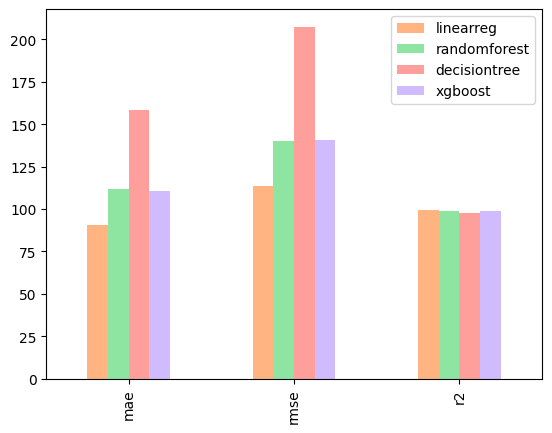

In [78]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3], 
                 sns.color_palette("pastel")[4]]);

Hyperparameter Tuning

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [80]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [82]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs_model, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs_model)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))
    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

In [83]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 4}
Best MAE: -119.782
Test set mean absolute error for best params: 117.346 
Test set root mean squared error for best params: 10.833 

Estimator: Random Forest
Best Config: {'model__criterion': 'absolute_error', 'sel__k': 4}
Best MAE: -127.369
Test set mean absolute error for best params: 123.665 
Test set root mean squared error for best params: 11.120 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 4}
Best MAE: -133.965
Test set mean absolute error for best params: 136.987 
Test set root mean squared error for best params: 11.704 

Estimator: Decision Tree
Best Config: {'model__criterion': 'squared_error', 'sel__k': 4}
Best MAE: -166.705
Test set mean absolute error for best params: 170.112 
Test set root mean squared error for best params: 13.043 

Classifier with least test set MAE: Logistic Regression
Best Model: Logistic Regression
Error Rate: 117.34554086214528
GridSe

Although Linear Regression is the best of the listed models, RandomForest would potentially produce closer accurate results, due to the good learning rate.

In [88]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=9)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs_model, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs_model)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))


Random Forest V-1 optimising...


/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A colu

Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -114.530
Test set mean absolute error for best params: 111.215 
Test set root mean squared error for best params: 10.546 


/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/admin/miniconda3/envs/ai_report/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [90]:
#saving the model
import joblib
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry_pollination_tuned_model.joblib'
joblib.dump(RF1, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Random Forest tuned model to directory by name: randomforest_blueberry_pollination_tuned_model.joblib


In [91]:
pd.DataFrame(X_test_fs_model).to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_fs_model, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")


Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [92]:
pd.DataFrame(X_test_fs_model).to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_fs_model, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")



Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [93]:
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
